<a href="https://colab.research.google.com/github/dostirathi031/alz_Detection/blob/main/majority_voting_grad_cam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

2025-04-10 15:38:16.279687: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1744299496.475889      31 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1744299496.529349      31 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
I0000 00:00:1744299509.082743      31 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 15513 MB memory:  -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0


                                           filepaths         labels
0  /kaggle/input/augmented-alzheimer-mri-dataset/...  Mild Demented
1  /kaggle/input/augmented-alzheimer-mri-dataset/...  Mild Demented
2  /kaggle/input/augmented-alzheimer-mri-dataset/...  Mild Demented
3  /kaggle/input/augmented-alzheimer-mri-dataset/...  Mild Demented
4  /kaggle/input/augmented-alzheimer-mri-dataset/...  Mild Demented
labels
Non Demented         9600
Mild Demented        8960
Very MildDemented    8960
Moderate Demented    6464
Name: count, dtype: int64
(19030, 2)
(10196, 2)
(4758, 2)
(23788, 2)
Found 19030 validated image filenames belonging to 4 classes.
Found 10196 validated image filenames belonging to 4 classes.
Found 4758 validated image filenames belonging to 4 classes.
['Mild Demented', 'Moderate Demented', 'Non Demented', 'Very MildDemented']


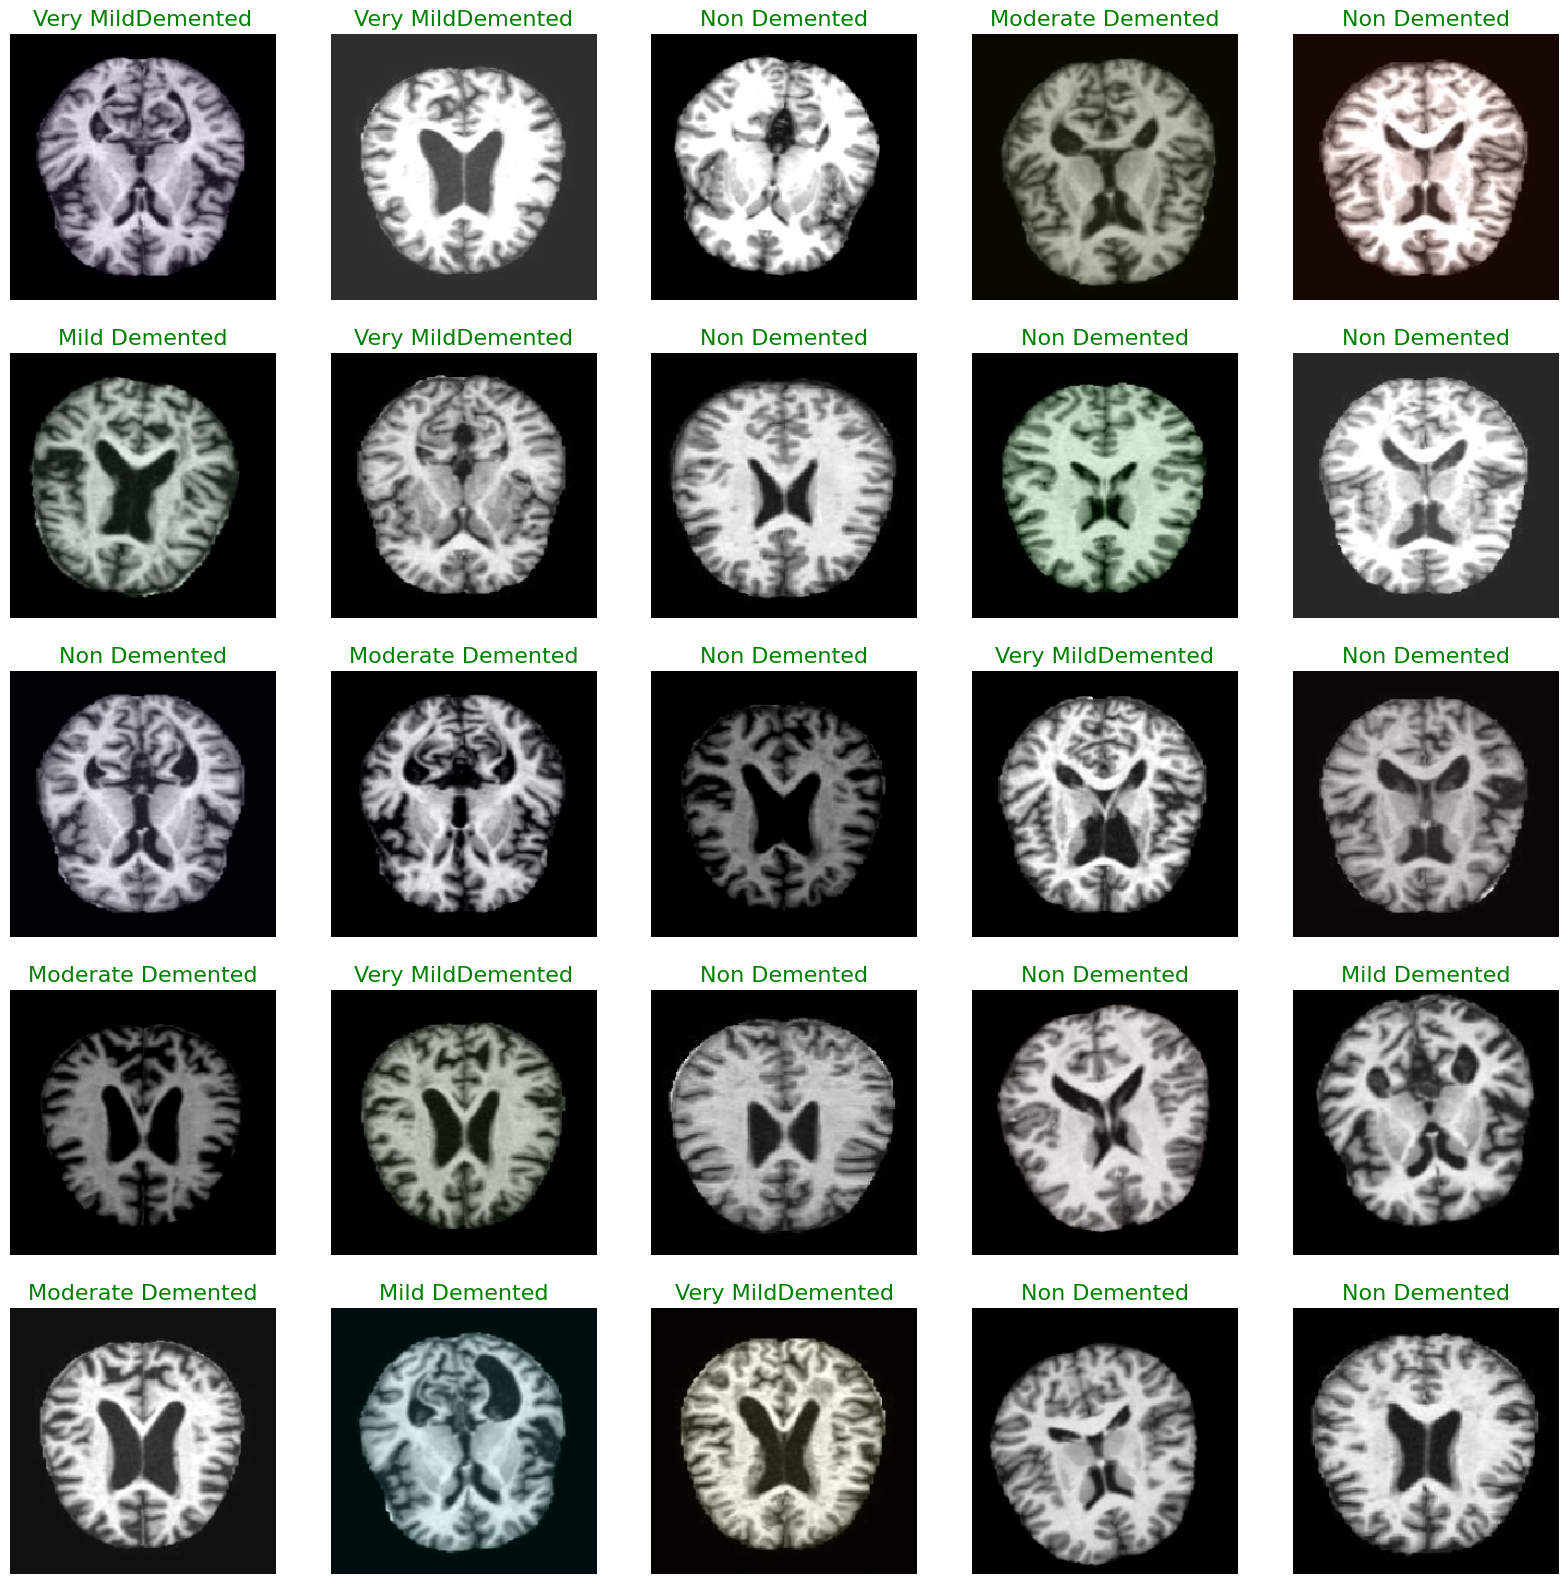

I0000 00:00:1744299547.687725      92 service.cc:148] XLA service 0x78a9280048a0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1744299547.688623      92 service.cc:156]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0
I0000 00:00:1744299548.136744      92 cuda_dnn.cc:529] Loaded cuDNN version 90300


  2/319 ━━━━━━━━━━━━━━━━━━━━ 20s 65ms/step

I0000 00:00:1744299552.858241      92 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


319/319 ━━━━━━━━━━━━━━━━━━━━ 82s 238ms/step
319/319 ━━━━━━━━━━━━━━━━━━━━ 90s 228ms/step
319/319 ━━━━━━━━━━━━━━━━━━━━ 48s 125ms/step
319/319 ━━━━━━━━━━━━━━━━━━━━ 39s 95ms/step
                   precision    recall  f1-score   support

    Mild Demented       0.98      1.00      0.99      2688
Moderate Demented       1.00      1.00      1.00      1940
     Non Demented       0.98      0.98      0.98      2880
Very MildDemented       0.99      0.97      0.98      2688

         accuracy                           0.99     10196
        macro avg       0.99      0.99      0.99     10196
     weighted avg       0.99      0.99      0.99     10196

Accuracy: 0.9861710474695959
Accuracy: 98.62%


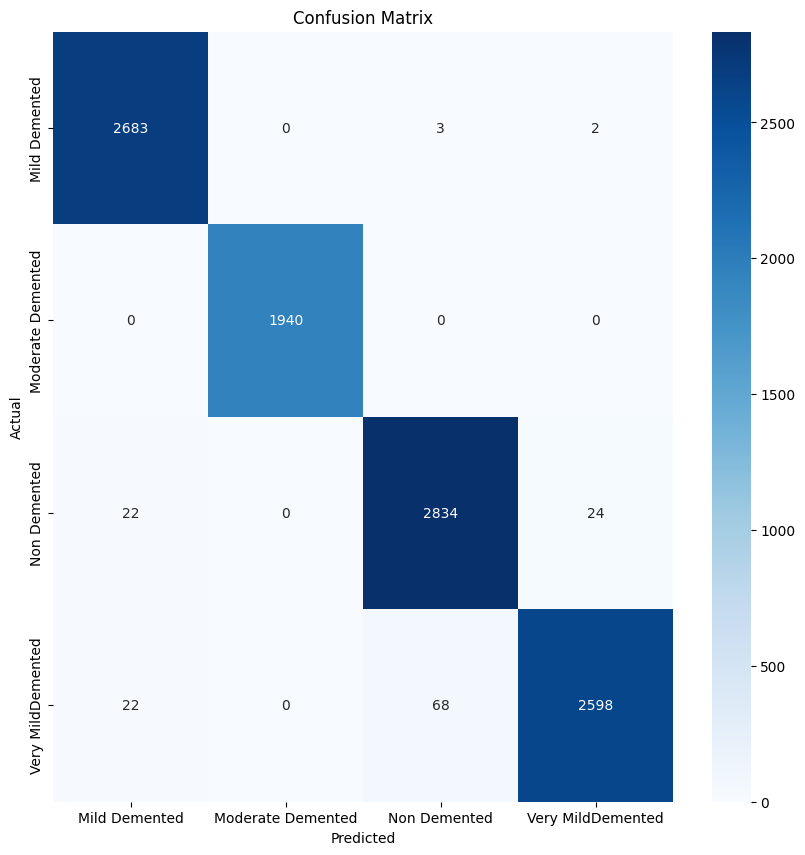

xception votes : 90.98%
efficientnet votes: 92.64%
vgg19 votes: 98.59%
inception votes: 96.53%
Accuracy for Xception: 90.11%
Accuracy for EfficientNetB7: 92.37%
Accuracy for VGG19: 99.30%
Accuracy for InceptionV3: 96.04%
Accuracy for Majority Voting: 98.62%

The best model is VGG19 with an accuracy of 99.30%.


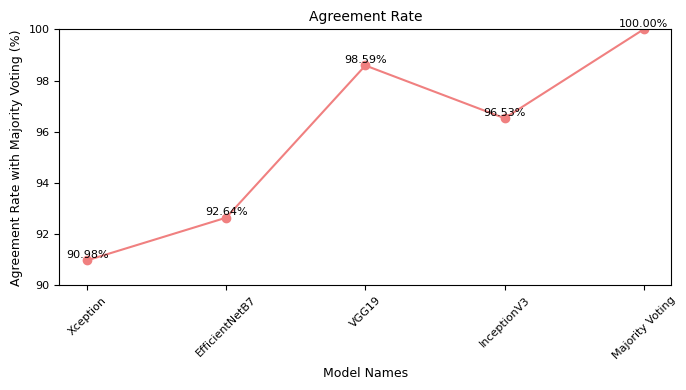

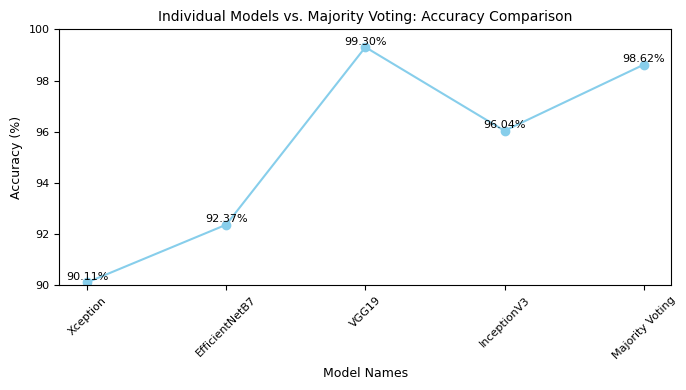

In [ ]:
import numpy as np
import pandas as pd
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        os.path.join(dirname, filename)

import os
import pandas as pd
import numpy as np
import keras
import warnings

warnings.filterwarnings(action="ignore")

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import TensorBoard, EarlyStopping

import sklearn.metrics as metrics
from keras.callbacks import LearningRateScheduler
annealer = LearningRateScheduler(lambda x: 1e-3 * 0.95 ** x, verbose=0)


import numpy as np
from scipy.stats import mode
from tensorflow.keras.models import load_model

xception_model_path = '/kaggle/input/xception-model/other/default/1/Xception_alzheimer_model.h5'
efficientnet_model_path = '/kaggle/input/efficientnet-model/other/default/1/EfficientB7.h5'
vgg19_model_path = '/kaggle/input/vgg19-model/other/default/1/vgg19_alzheimer_model.h5'
inception_model_path = '/kaggle/input/inceptionv3-model/other/default/1/inceptionv3_alzheimer_model (1).h5'

# Load the models
xception_model = load_model(xception_model_path)
efficientnet_model = load_model(efficientnet_model_path)
vgg19_model = load_model(vgg19_model_path)
inception_model = load_model(inception_model_path)



MildDemented_dir = r'/kaggle/input/augmented-alzheimer-mri-dataset/AugmentedAlzheimerDataset/MildDemented'
ModerateDemented_dir = r'/kaggle/input/augmented-alzheimer-mri-dataset/AugmentedAlzheimerDataset/ModerateDemented'
NonDemented_dir = r'/kaggle/input/augmented-alzheimer-mri-dataset/AugmentedAlzheimerDataset/NonDemented'
VeryMildDemented_dir = r'/kaggle/input/augmented-alzheimer-mri-dataset/AugmentedAlzheimerDataset/VeryMildDemented'

filepaths = []
labels = []
dict_list = [MildDemented_dir, ModerateDemented_dir, NonDemented_dir, VeryMildDemented_dir]
class_labels = ['Mild Demented', 'Moderate Demented', 'Non Demented', 'Very MildDemented']

for i, j in enumerate(dict_list):
    flist = os.listdir(j)
    for f in flist:
        fpath = os.path.join(j, f)
        filepaths.append(fpath)
        labels.append(class_labels[i])

Fseries = pd.Series(filepaths, name="filepaths")
Lseries = pd.Series(labels, name="labels")
Alzheimer_data = pd.concat([Fseries, Lseries], axis=1)
Alzheimer_df = pd.DataFrame(Alzheimer_data)
print(Alzheimer_df.head())
print(Alzheimer_df["labels"].value_counts())


Alzheimer_df.shape

train_images, test_images = train_test_split(
    Alzheimer_df, test_size=0.3, random_state=42, stratify=Alzheimer_df['labels']
)
train_set, val_set = train_test_split(
    train_images, test_size=0.2, random_state=42, stratify=train_images['labels']
)


print(train_set.shape)
print(test_images.shape)
print(val_set.shape)
print(train_images.shape)

image_gen_1 = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input)

train_1 = image_gen_1.flow_from_dataframe(dataframe=train_set, x_col="filepaths", y_col="labels",
                                      target_size=(244, 244),
                                      color_mode='rgb',
                                      class_mode="categorical",
                                      batch_size=32,
                                      shuffle=True
                                     )
test_1 = image_gen_1.flow_from_dataframe(dataframe=test_images, x_col="filepaths", y_col="labels",
                                     target_size=(244, 244),
                                     color_mode='rgb',
                                     class_mode="categorical",
                                     batch_size=32,
                                     shuffle=False
                                    )
val_1 = image_gen_1.flow_from_dataframe(dataframe=val_set, x_col="filepaths", y_col="labels",
                                    target_size=(244, 244),
                                    color_mode='rgb',
                                    class_mode="categorical",
                                    batch_size=32,
                                    shuffle=False
                                   )

classes = list(train_1.class_indices.keys())
print(classes)

def show_knee_images(image_gen):
    test_dict = test_1.class_indices
    classes = list(test_dict.keys())
    images, labels=next(image_gen)
    plt.figure(figsize=(20,20))
    length = len(labels)
    if length<25:
        r=length
    else:
        r=25
    for i in range(r):
        plt.subplot(5,5,i+1)
        image=(images[i]+1)/2 #scale images between 0 and 1
        plt.imshow(image)
        index=np.argmax(labels[i])
        class_name=classes[index]
        plt.title(class_name, color="green",fontsize=16)
        plt.axis('off')
    plt.show()

show_knee_images(test_1)

xception_model_1 = xception_model.predict(test_1)

xception_model_1.shape

xception_model_1

pred_1 = np.argmax(xception_model_1 , axis = 1)

pred_1

pred_1.shape

efficientnet_model_1 = efficientnet_model.predict(test_1)

efficientnet_model_1.shape

efficientnet_model_1

pred_2 = np.argmax(efficientnet_model_1 , axis = 1)

pred_2

pred_2.shape

vgg19_model_1 = vgg19_model.predict(test_1)

vgg19_model_1.shape

vgg19_model_1

pred_3 = np.argmax(vgg19_model_1 , axis = 1)

pred_3

pred_3.shape

inception_model_1 = inception_model.predict(test_1)

inception_model_1.shape

inception_model_1

pred_4 = np.argmax(inception_model_1 , axis = 1)

pred_4

pred_4.shape

pred_1a = np.array(pred_1)

pred_1a

pred_2a = np.array(pred_2)

pred_2a

pred_3a = np.array(pred_3)

pred_3a

pred_4a = np.array(pred_4)

pred_4a

stacked_preds = np.vstack([pred_1a, pred_2a, pred_3a, pred_4a])

stacked_preds

from scipy.stats import mode
majority_voting = mode(stacked_preds, axis=0).mode

majority_voting

y_test = test_images.labels

y_test

y_test.shape

labels = train_1.class_indices
labels = dict((v, k) for k, v in labels.items())
overall_pred = [labels[k] for k in majority_voting]

overall_pred

from sklearn.metrics import classification_report, accuracy_score

print(classification_report(y_test, overall_pred))
accuracy = accuracy_score(y_test, overall_pred)
print("Accuracy:", accuracy)

print(f"Accuracy: {accuracy * 100:.2f}%")

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Define the class labels
class_labels = ['Mild Demented', 'Moderate Demented', 'Non Demented', 'Very MildDemented']

# Calculate the confusion matrix
cm = confusion_matrix(y_test, overall_pred)

# Create a figure and plot the confusion matrix as a heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt='g', vmin=0, cmap='Blues')

# Set tick labels and axis labels
plt.xticks(ticks=[0.5, 1.5, 2.5, 3.5], labels=class_labels)
plt.yticks(ticks=[0.5, 1.5, 2.5, 3.5], labels=class_labels)
plt.xlabel("Predicted")
plt.ylabel("Actual")

# Set the title
plt.title("Confusion Matrix")

# Show the plot
plt.show()

#Best Model Findout

df = pd.DataFrame({
    "Model_1": pred_1a,
    "Model_2": pred_2a,
    "Model_3": pred_3a,
    "Model_4": pred_4a,
    "Majority": majority_voting
})

# Calculate agreement for each model
agreement_rate_model1 = np.mean(pred_1a == majority_voting) * 100
agreement_rate_model2 = np.mean(pred_2a == majority_voting) * 100
agreement_rate_model3 = np.mean(pred_3a == majority_voting) * 100
agreement_rate_model4 = np.mean(pred_4a == majority_voting) * 100

print(f"xception votes : {agreement_rate_model1:.2f}%")
print(f"efficientnet votes: {agreement_rate_model2:.2f}%")
print(f"vgg19 votes: {agreement_rate_model3:.2f}%")
print(f"inception votes: {agreement_rate_model4:.2f}%")

# Ensure the `labels` dictionary exists and maps indices to class names
labels = train_1.class_indices  # From the training dataset
labels = dict((v, k) for k, v in labels.items())  # Reverse the mapping

# Define the function to convert predictions to class labels
def get_class_labels(predictions, labels_dict):
    return [labels_dict[p] for p in np.argmax(predictions, axis=1)]

# Convert predictions to class labels for each model
xception_pred_labels = get_class_labels(xception_model_1, labels)
efficientnet_pred_labels = get_class_labels(efficientnet_model_1, labels)
vgg19_pred_labels = get_class_labels(vgg19_model_1, labels)
inception_pred_labels = get_class_labels(inception_model_1, labels)

# Now create the `models` dictionary
models = {
    "Xception": xception_pred_labels,
    "EfficientNetB7": efficientnet_pred_labels,
    "VGG19": vgg19_pred_labels,
    "InceptionV3": inception_pred_labels,
    "Majority Voting": overall_pred
}

# The rest of the code to find the best model remains unchanged
best_model_name = None
best_accuracy = 0.0

for model_name, preds in models.items():
    accuracy = accuracy_score(y_test, preds)
    print(f"Accuracy for {model_name}: {accuracy * 100:.2f}%")

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model_name = model_name

print(f"\nThe best model is {best_model_name} with an accuracy of {best_accuracy * 100:.2f}%.")

#Agreement Rate Line Graph
import numpy as np
import matplotlib.pyplot as plt

# Create a dictionary to store agreement rates
agreement_dict = {}

# Ensure overall_pred is a NumPy array
overall_pred = np.array(overall_pred)

# Calculate agreement of each model with the majority voting predictions
for model_name, preds in models.items():
    preds = np.array(preds)  # Convert each prediction list to NumPy array
    agreement = np.sum(preds == overall_pred) / len(overall_pred) * 100
    agreement_dict[model_name] = agreement

# Convert to lists
model_names = list(agreement_dict.keys())
agreement_rates = list(agreement_dict.values())

# Plotting line graph with y-axis range 90 to 100
plt.figure(figsize=(7, 4))
plt.plot(model_names, agreement_rates, marker='o', linestyle='-', color='lightcoral')

# Annotate each point with agreement rate
for i, rate in enumerate(agreement_rates):
    plt.text(i, rate + 0.1, f'{rate:.2f}%', ha='center', fontsize=8)

plt.xlabel('Model Names', fontsize=9)
plt.ylabel('Agreement Rate with Majority Voting (%)', fontsize=9)
plt.title('Agreement Rate', fontsize=10)
plt.ylim(90, 100)  # Zoomed-in y-axis range for better visualization
plt.xticks(rotation=45, fontsize=8)
plt.yticks(fontsize=8)
plt.tight_layout()
plt.show()

#Individual Models vs. Majority Voting: Accuracy Comparison Line Graph
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

# Create a dictionary to store model names and their accuracies
accuracy_dict = {}

for model_name, preds in models.items():
    accuracy = accuracy_score(y_test, preds)
    accuracy_dict[model_name] = accuracy * 100  # Store accuracy in percentage

# Convert dict to lists
model_names = list(accuracy_dict.keys())
accuracies = list(accuracy_dict.values())

# Plotting line graph with zoomed-in y-axis
plt.figure(figsize=(7, 4))
plt.plot(model_names, accuracies, marker='o', linestyle='-', color='skyblue')

# Annotate each point with accuracy
for i, acc in enumerate(accuracies):
    plt.text(i, acc + 0.1, f'{acc:.2f}%', ha='center', fontsize=8)

plt.xlabel('Model Names', fontsize=9)
plt.ylabel('Accuracy (%)', fontsize=9)
plt.title('Individual Models vs. Majority Voting: Accuracy Comparison', fontsize=10)
plt.ylim(90, 100)  # Zoomed-in range for better visualization
plt.xticks(rotation=45, fontsize=8)
plt.yticks(fontsize=8)
plt.tight_layout()
plt.show()

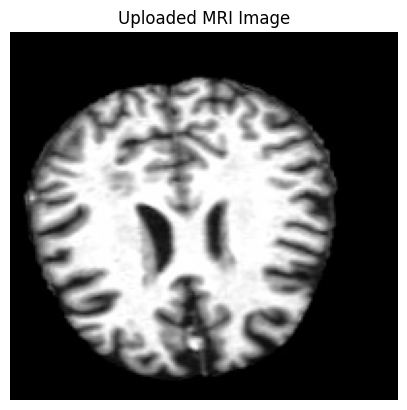

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Predicted class: Very Mild Demented


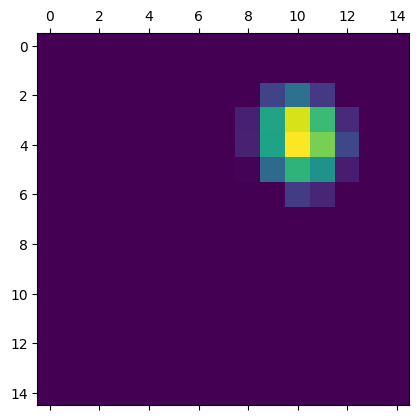

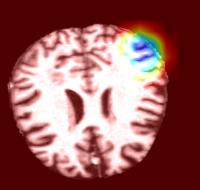

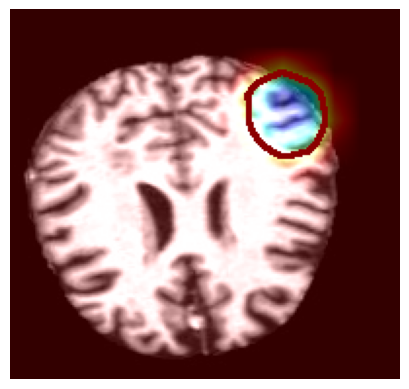

Top activated regions (high importance) at pixels: [[3, 10], [4, 10], [4, 11]]...
Max Activation Score: 1.00, Average Activation: 0.03. Regions with activation > 0.7 are considered highly important.
The predicted class is 'Very Mild Demented'. The model strongly focuses on specific regions. The maximum heatmap activation is 1.00.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import load_model

# Load the trained model
model = load_model('/kaggle/input/vgg19-model/other/default/1/vgg19_alzheimer_model.h5')

# Define the image path
img_path = "/kaggle/input/augmented-alzheimer-mri-dataset/AugmentedAlzheimerDataset/VeryMildDemented/0001b959-d622-4311-acab-84633370c892.jpg"

# Load the image and resize it to match the model's input size
img = keras.preprocessing.image.load_img(img_path, target_size=(244, 244))

# Convert image to a NumPy array
img_array = keras.preprocessing.image.img_to_array(img)

# Expand dimensions to match the batch size expected by the model
img_array = np.expand_dims(img_array, axis=0)

# Normalize pixel values to the range [0, 1]
#img_array /= 255.0
img_array = (img_array / 127.5) - 1  # Normalize to [-1,1]

from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Path to the input image
img_path = "/kaggle/input/augmented-alzheimer-mri-dataset/AugmentedAlzheimerDataset/VeryMildDemented/0001b959-d622-4311-acab-84633370c892.jpg"

# Load and display the original image
img = load_img(img_path)
plt.figure(figsize=(5, 5))
plt.imshow(img)
plt.axis("off")
plt.title("Uploaded MRI Image")
plt.show()

# Make prediction using the trained model
preds = model.predict(img_array)

# Define class labels
class_labels = {0: 'Mild Demented', 1: 'Moderate Demented', 2: 'Non Demented', 3: 'Very Mild Demented'}

# Get the predicted class with the highest probability
predicted_class = class_labels[np.argmax(preds)]

print(f"Predicted class: {predicted_class}")

# Grad-CAM implementation
def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    # Get the base model (Xception)
    base_model = model.layers[0]

    # Build a model that maps input image to activations of the last conv layer
    grad_model = keras.models.Model(
        inputs=base_model.input,
        outputs=[base_model.get_layer(last_conv_layer_name).output, base_model.output]
    )

    # Compute the gradient of the top predicted class for the input image
    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(preds[0])
        class_channel = preds[:, pred_index]

    # Compute the gradient of the class output with respect to the feature map
    grads = tape.gradient(class_channel, last_conv_layer_output)

    # Compute mean intensity of the gradients for each channel
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # Multiply each channel in the feature map array by "how important" this channel is
    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    # Normalize the heatmap
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()


# Specify the last convolutional layer name
last_conv_layer_name = "block5_conv4"

# Generate the heatmap
heatmap = make_gradcam_heatmap(img_array, model, last_conv_layer_name)

# Display the heatmap
plt.matshow(heatmap)
plt.show()

import numpy as np
import tensorflow as tf
import keras
from keras.utils import load_img, img_to_array, array_to_img
from matplotlib import pyplot as plt
from IPython.display import Image, display
import cv2

def save_and_display_gradcam(img_path, heatmap, cam_path="gradcam_image.jpg", alpha=0.6, beta=0.6):
    # Load the original image
    img = load_img(img_path)
    img_array = img_to_array(img)

    # Rescale the heatmap to 0-255
    heatmap = np.uint8(255 * heatmap)

    # Resize heatmap to match image size
    heatmap = cv2.resize(heatmap, (img_array.shape[1], img_array.shape[0]))
     # Convert grayscale heatmap to 3-channel format (RGB)
    if len(heatmap.shape) == 2:
        heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)

    # Ensure both image and heatmap have same number of channels (3)
    if img_array.shape[-1] == 1:  # Convert grayscale image to RGB
        img_array = np.stack([img_array.squeeze()] * 3, axis=-1)


    # Blend heatmap with the original image
    superimposed_img = cv2.addWeighted(img_array.astype(np.uint8), 1, heatmap, beta, 0)

    # Convert back to image format
    superimposed_img = np.clip(superimposed_img, 0, 255).astype('uint8')
    superimposed_img = array_to_img(superimposed_img)

    # Save and display the result
    superimposed_img.save(cam_path)
    display(Image(cam_path))

# Generate and display the Grad-CAM
img_path = "/kaggle/input/augmented-alzheimer-mri-dataset/AugmentedAlzheimerDataset/VeryMildDemented/0001b959-d622-4311-acab-84633370c892.jpg"
save_and_display_gradcam(img_path, heatmap)

import cv2
import numpy as np
import matplotlib.pyplot as plt
from keras.utils import img_to_array, array_to_img, load_img

def draw_outline(img_path, heatmap, cam_path="gradcam_with_outline.jpg", alpha=0.4):
    # Load original image
    img = load_img(img_path)
    img_array = img_to_array(img).astype(np.uint8)

    # Resize heatmap to match image size
    heatmap = cv2.resize(heatmap, (img_array.shape[1], img_array.shape[0]))

    # Convert heatmap to grayscale
    gray_heatmap = cv2.normalize(heatmap, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)

    # Threshold the heatmap to extract the highlighted region
    _, binary_mask = cv2.threshold(gray_heatmap, 100, 255, cv2.THRESH_BINARY)

    # Find contours of the highlighted area
    contours, _ = cv2.findContours(binary_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Apply the jet colormap to heatmap
    heatmap_color = cv2.applyColorMap(gray_heatmap, cv2.COLORMAP_JET)

    # Blend heatmap with the original image
    superimposed_img = cv2.addWeighted(img_array, 1, heatmap_color, alpha, 0)

    # Draw the contours with DARK RED color
    cv2.drawContours(superimposed_img, contours, -1, (139, 0, 0), 2)  # Dark red outline

    # Convert and save the image
    output_image = array_to_img(superimposed_img)
    output_image.save(cam_path)

    # Display result
    plt.imshow(output_image)
    plt.axis("off")
    plt.show()

# Call function with your Grad-CAM heatmap
draw_outline(img_path, heatmap)

import numpy as np

# Extract top N activated pixels
def extract_hotspots(heatmap, threshold=0.7):
    """
    Identifies top regions in the heatmap based on a threshold.
    Returns pixel coordinates where activation is high.
    """
    # Find locations where heatmap values exceed the threshold
    hotspots = np.argwhere(heatmap > threshold)

    # Convert to text-based description
    if len(hotspots) > 0:
        text_output = f"Top activated regions (high importance) at pixels: {hotspots[:10].tolist()}..."
    else:
        text_output = "No significant regions detected above threshold."

    return text_output

# Example Usage
text_description = extract_hotspots(heatmap)
print(text_description)

def interpret_heatmap(heatmap):
    """
    Converts heatmap into a text-based description.
    """
    max_activation = np.max(heatmap)
    avg_activation = np.mean(heatmap)

    return f"Max Activation Score: {max_activation:.2f}, Average Activation: {avg_activation:.2f}. " \
           f"Regions with activation > 0.7 are considered highly important."

# Example Usage
text_interpretation = interpret_heatmap(heatmap)
print(text_interpretation)

def generate_summary(predicted_class, heatmap):
    """
    Creates a natural language summary of Grad-CAM results.
    """
    max_activation = np.max(heatmap)

    if max_activation > 0.7:
        focus = "The model strongly focuses on specific regions."
    elif max_activation > 0.4:
        focus = "The model focuses on multiple areas with moderate importance."
    else:
        focus = "The model's attention is spread out without a strong focal point."

    return f"The predicted class is '{predicted_class}'. {focus} The maximum heatmap activation is {max_activation:.2f}."

# Example Usage
#predicted_class = "Very Mild Demented"
summary_text = generate_summary(predicted_class, heatmap)
print(summary_text)